The goal of this program is to match the NSA galaxies to the AGC catalogs.

Ideally, there will be a one-to-one match, but of course, nothing is ideal...

So what do we do with galaxies that don't have an NSA match?  We will need to 
get their SDSS colors another way so that we can properly separate them into 
blue and red, and so we can estimate their stellar masses.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import glob
%matplotlib inline

In [2]:
def findnearest(x1,y1,x2,y2,delta):#use where command
    matchflag=1
    nmatch=0
    d=np.sqrt((x1-x2)**2 + (y1-y2)**2)#x2 and y2 are arrays
    index=np.arange(len(d))
    t=index[d<delta]
    matches=t
    if len(matches) > 0:
        nmatch=len(matches)
        if nmatch > 1:
            imatch=index[(d == min(d[t]))]
        else:
            imatch=matches[0]
    else:
        imatch = 0
        matchflag = 0

    return imatch, matchflag,nmatch

In [3]:
def compare_samples(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,'bo')
    plt.plot(x2,y2,'ks')

In [37]:
# match radiuss = 3 arcsec
matchradius=3./3600 # convert to degrees

    
clusterfiles=glob.glob('NRG*AGC.fits')
for cfile in clusterfiles:
    agcdat=fits.getdata(cfile)
    name=cfile.split('_')[0]
    nsafile=name+'_NSA.fits'
    print nsafile
    nsadat=fits.getdata(nsafile)
    imatch=np.zeros(len(agcdat.RA),'i')
    matchflag=np.zeros(len(agcdat.RA),'bool')
    nmatch=np.zeros(len(agcdat.RA),'i')
    for i in range(len(agcdat.RA)):
        imatch[i],matchflag[i],nmatch[i] = findnearest(agcdat.RA[i],agcdat.DEC[i],nsadat.RA,nsadat.DEC,matchradius)
    
    outfile=name+'_matchNSAtoAGC.fits'
    
    orig_cols = agcdat.columns
    new_cols = []
    for col in nsadat.columns.names:
        print col
        base=nsadat[col]
        print base.shape,matchflag.shape
        #a=nsadat[col][imatch]*matchflag + np.zeros(len(nsadat[col]))*matchflag
        #print a.shape
                                        
        #t=fits.Column(name=col, array=a)
        
    #fits.ColDefs([new_cols])
    #hdu = fits.BinTableHDU.from_columns(orig_cols + new_cols)
    #hdu.writeto(outfile,clobber='yes')

NRGb004_NSA.fits
IAUNAME
(155,) (168,)
SUBDIR
(155,) (168,)
RA
(155,) (168,)
DEC
(155,) (168,)
ISDSS
(155,) (168,)
INED
(155,) (168,)
ISIXDF
(155,) (168,)
IALFALFA
(155,) (168,)
IZCAT
(155,) (168,)
ITWODF
(155,) (168,)
MAG
(155,) (168,)
Z
(155,) (168,)
ZSRC
(155,) (168,)
SIZE
(155,) (168,)
RUN
(155,) (168,)
CAMCOL
(155,) (168,)
FIELD
(155,) (168,)
RERUN
(155,) (168,)
XPOS
(155,) (168,)
YPOS
(155,) (168,)
ZLG
(155,) (168,)
ZDIST
(155,) (168,)
ZDIST_ERR
(155,) (168,)
NSAID
(155,) (168,)
NMGY
(155, 7) (168,)
NMGY_IVAR
(155, 7) (168,)
OK
(155,) (168,)
RNMGY
(155, 7) (168,)
ABSMAG
(155, 7) (168,)
AMIVAR
(155, 7) (168,)
EXTINCTION
(155, 7) (168,)
KCORRECT
(155, 7) (168,)
KCOEFF
(155, 5) (168,)
MTOL
(155, 7) (168,)
B300
(155,) (168,)
B1000
(155,) (168,)
METS
(155,) (168,)
MASS
(155,) (168,)
XCEN
(155,) (168,)
YCEN
(155,) (168,)
NPROF
(155, 7) (168,)
PROFMEAN
(155, 15, 7) (168,)
PROFMEAN_IVAR
(155, 15, 7) (168,)
QSTOKES
(155, 15, 7) (168,)
USTOKES
(155, 15, 7) (168,)
BASTOKES
(155, 15, 7) (168

In [31]:
help(fits.Column)

Help on class Column in module astropy.io.fits.column:

class Column(astropy.io.fits.util.NotifierMixin)
 |  Class which contains the definition of one column, e.g.  ``ttype``,
 |  ``tform``, etc. and the array containing values for the column.
 |  
 |  Method resolution order:
 |      Column
 |      astropy.io.fits.util.NotifierMixin
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Two columns are equal if their name and format are the same.  Other
 |      attributes aren't taken into account at this time.
 |  
 |  __hash__(self)
 |      Like __eq__, the hash of a column should be based on the unique column
 |      name and format, and be case-insensitive with respect to the column
 |      name.
 |  
 |  __init__(self, name=None, format=None, unit=None, null=None, bscale=None, bzero=None, disp=None, start=None, dim=None, array=None, ascii=None)
 |      Construct a `Column` by specifying attributes.  All attributes
 |      except `format` c

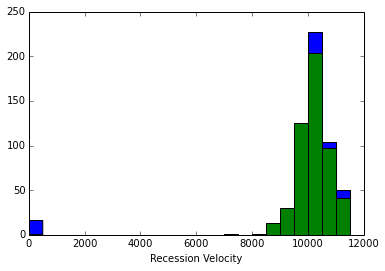

In [7]:
plt.figure()
plt.hist(agcdat.VOPT,color='b',bins=np.arange(0,12000,500))
plt.hist(nsadat.ZDIST*3.e5,color='g',bins=np.arange(0,12000,500))
plt.xlabel('Recession Velocity')